<a href="https://colab.research.google.com/github/mg-blvd/capstone-datasets/blob/main/Sleeping_and_Anxiety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import graphviz

In [4]:

data_dir = "https://raw.githubusercontent.com/mg-blvd/capstone-datasets/main/Time_to_think_Norbury.csv"
df = pd.read_csv(data_dir)

In [5]:
df.head(10)

,University,Case_Number,Age,Sex,Year_of_Study,Department_Name,MEQ,Trait_Anxiety,Start_time_code,Start_time,PSQI_component_1,Avg_Weekly_Sleep_Duration,Avg_Sleep_Working_days,Avg_sleep_free_days,Daytime_Dozing,Daytime_Dozing_Groups,Cigarettes_dichotomous,Alcohol_dichotomous,Caffeine_dichotomous,coffee_dichotomous,psqi_2_groups
0,1,1,19,2,2,Psychology,15,30,7,12:00,1,6.42,5.17,9.57,4,1,1,1,1,1,1
1,1,2,18,2,1,Psychology,13,50,5,10:00,2,8.46,8.25,9.00,6,2,1,2,1,1,2
2,1,3,19,2,2,Psychology,21,32,4,09:00,1,6.81,7.67,5.67,2,1,1,1,1,2,1
3,1,4,19,2,1,Psychology,9,53,6,11:00,1,8.61,6.00,12.08,6,2,2,1,1,2,1
4,1,5,19,2,2,Psychology,17,39,5,10:00,1,7.88,7.33,9.25,9,2,1,2,1,2,1
5,1,6,18,2,1,Psychology,5,60,6,11:00,2,7.42,5.98,11.00,8,2,1,1,2,2,2
6,1,7,19,2,1,Psychology,8,70,6,11:00,2,6.56,5.32,7.50,4,1,1,2,1,2,2
7,1,8,19,2,1,Psychology,8,43,5,10:00,2,5.71,5.98,5.50,7,2,1,1,1,2,2
8,1,9,19,2,2,Psychology,16,39,4,09:00,0,9.57,8.50,10.00,2,1,1,1,1,2,1
9,1,10,19,2,2,Psychology,11,61,6,11:00,2,6.49,6.17,8.42,10,2,1,1,1,2,2


# Specific Column Info
MEQ (Morningness-Eveningness Questionnaire):  
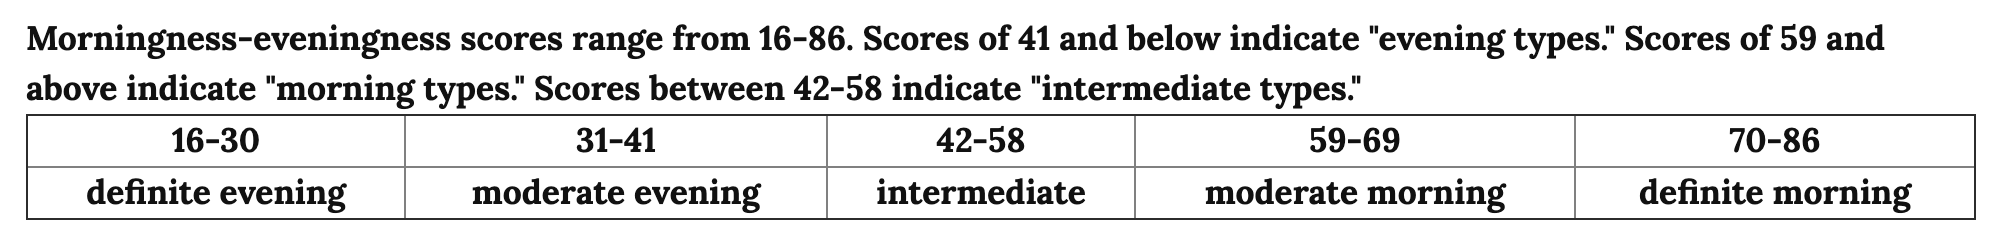  
PSQI: Pittsburgh Sleep Quality Index:   
0 - very good sleep, 1 - fairly good sleep, 2 - fairly bad sleep, 3 - very bad sleep  
Trait Anxiety:  
Measured using the 20 item Speilberg Trait Anxiety Index. Assessment uses a 4-point scale  
(1 - almost never, 2 - sometimes, 3 - often, 4 - almost always

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   University                 546 non-null    int64  
 1   Case_Number                546 non-null    int64  
 2   Age                        546 non-null    int64  
 3   Sex                        546 non-null    int64  
 4   Year_of_Study              546 non-null    int64  
 5   Department_Name            546 non-null    object 
 6   MEQ                        546 non-null    int64  
 7   Trait_Anxiety              546 non-null    int64  
 8   Start_time_code            546 non-null    int64  
 9   Start_time                 546 non-null    object 
 10  PSQI_component_1           546 non-null    int64  
 11  Avg_Weekly_Sleep_Duration  546 non-null    float64
 12  Avg_Sleep_Working_days     546 non-null    float64
 13  Avg_sleep_free_days        546 non-null    float64

# Initial Data Exploration
There are 546 row  
21 different columns  
Types of columns:  
float64(3), int64(16), object(2)

In [7]:
df.describe().round()

,University,Case_Number,Age,Sex,Year_of_Study,MEQ,Trait_Anxiety,Start_time_code,PSQI_component_1,Avg_Weekly_Sleep_Duration,Avg_Sleep_Working_days,Avg_sleep_free_days,Daytime_Dozing,Daytime_Dozing_Groups,Cigarettes_dichotomous,Alcohol_dichotomous,Caffeine_dichotomous,coffee_dichotomous,psqi_2_groups
count,546.0,546.0,546.0,546.0,546.0,546.0,546.0,546.0,546.0,546.0,546.0,546.0,546.0,546.0,546.0,546.0,546.0,546.0,546.0
mean,1.0,274.0,20.0,2.0,2.0,12.0,47.0,6.0,2.0,7.0,7.0,9.0,8.0,2.0,1.0,2.0,1.0,2.0,1.0
std,0.0,158.0,4.0,0.0,1.0,4.0,11.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,18.0,1.0,1.0,4.0,20.0,3.0,0.0,3.0,2.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,137.0,19.0,2.0,1.0,9.0,39.0,5.0,1.0,7.0,6.0,8.0,5.0,1.0,1.0,1.0,1.0,2.0,1.0
50%,1.0,274.0,19.0,2.0,1.0,12.0,47.0,6.0,1.0,7.0,6.0,9.0,7.0,2.0,1.0,2.0,1.0,2.0,1.0
75%,2.0,410.0,20.0,2.0,2.0,14.0,55.0,6.0,2.0,8.0,8.0,10.0,10.0,2.0,1.0,2.0,2.0,2.0,2.0
max,2.0,546.0,55.0,2.0,3.0,23.0,78.0,11.0,3.0,13.0,12.0,14.0,23.0,5.0,2.0,2.0,2.0,2.0,2.0


# Data Averages
Age: 20  
Year of Study: 2  
MEQ: 12  
Average sleep duration: 7 hours
Average sleep working: 7 hours  
Average sleep free: 9 hours   
PSQI 1 = Fairly bad sleep  
PSQI 2 = Fairly good sleep

In [8]:
df.isna().sum().sum()

0

# Data Cleaning
There were no sets that had any NA values. Therefore, no rows were dropped. The whole data set will be used. 

In [9]:
corr = df[['Age', 'Year_of_Study', 'MEQ', 'Trait_Anxiety',
           'PSQI_component_1', 'Avg_Weekly_Sleep_Duration', 
           'Avg_Sleep_Working_days', 'Avg_sleep_free_days', 
           'psqi_2_groups']].corr()

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

print(corr)

                                Age  Year_of_Study       MEQ  Trait_Anxiety  \
Age                        1.000000       0.081377  0.143918      -0.129537   
Year_of_Study              0.081377       1.000000  0.123775      -0.087000   
MEQ                        0.143918       0.123775  1.000000      -0.174869   
Trait_Anxiety             -0.129537      -0.087000 -0.174869       1.000000   
PSQI_component_1          -0.113740      -0.244260 -0.273987       0.365918   
Avg_Weekly_Sleep_Duration -0.079961      -0.005852  0.017707      -0.035553   
Avg_Sleep_Working_days    -0.022579       0.089773  0.207170      -0.090071   
Avg_sleep_free_days       -0.078962      -0.053156 -0.119127       0.018958   
psqi_2_groups             -0.066019      -0.257683 -0.225790       0.286133   

                           PSQI_component_1  Avg_Weekly_Sleep_Duration  \
Age                               -0.113740                  -0.079961   
Year_of_Study                     -0.244260                  

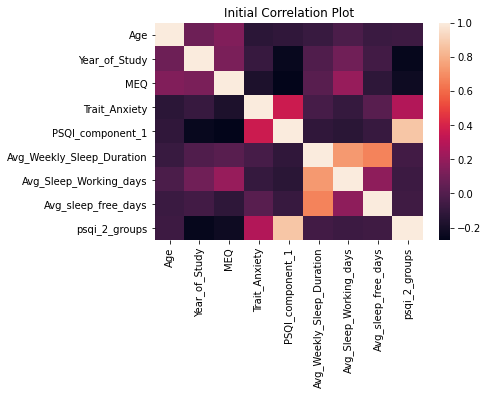

In [10]:
sns.heatmap(corr, xticklabels=corr.columns,
yticklabels=corr.columns)
plt.title('Initial Correlation Plot');

# Initial Correlation Review
Positive Correlations:  

*   PSQI-1 and Trait Anxiety have a very high correlation. This means that the higher sleep quality number (which represents worse sleep) the higher the trait anxiety
*  PSQI-2 and Trait Anxiety also have a high correlation (see above)
*  There is a slight correlation between MEQ and age. The older you are, the more of a morning person you are. 
*  There is a slight correlation between MEQ and years of study. The longer you have studied, the more of a morning person you are. 

Negative Correaltions:  

*  It seems that MEQ and Trait Anxiety has a slight negative correlation. This means that as MEQ goes up, Trait Anxiety goes down. (The higher the MEQ, the more of a Morning person the individual is)



In [12]:
from scipy.stats import pearsonr

dependent = 'Trait_Anxiety'

independents = ['Age',	'Sex',	'Year_of_Study',	'MEQ',	'Start_time_code',	
                'PSQI_component_1',	'Avg_Weekly_Sleep_Duration',	
                'Avg_Sleep_Working_days',	'Avg_sleep_free_days',	
                'Daytime_Dozing',	'Daytime_Dozing_Groups',
                'Cigarettes_dichotomous',	'Alcohol_dichotomous',	
                'Caffeine_dichotomous',	'coffee_dichotomous',	'psqi_2_groups']

for independent in independents:
  corr, _ = pearsonr(df[dependent], df[independent])
  print("Pearson correlation between %(de)s and %(in)s is %(num).3f" % 
        {'de': dependent, 'in': independent, 'num': corr} )

Pearson correlation between Trait_Anxiety and Age is -0.130
Pearson correlation between Trait_Anxiety and Sex is 0.190
Pearson correlation between Trait_Anxiety and Year_of_Study is -0.087
Pearson correlation between Trait_Anxiety and MEQ is -0.175
Pearson correlation between Trait_Anxiety and Start_time_code is 0.052
Pearson correlation between Trait_Anxiety and PSQI_component_1 is 0.366
Pearson correlation between Trait_Anxiety and Avg_Weekly_Sleep_Duration is -0.036
Pearson correlation between Trait_Anxiety and Avg_Sleep_Working_days is -0.090
Pearson correlation between Trait_Anxiety and Avg_sleep_free_days is 0.019
Pearson correlation between Trait_Anxiety and Daytime_Dozing is 0.161
Pearson correlation between Trait_Anxiety and Daytime_Dozing_Groups is 0.182
Pearson correlation between Trait_Anxiety and Cigarettes_dichotomous is 0.111
Pearson correlation between Trait_Anxiety and Alcohol_dichotomous is 0.109
Pearson correlation between Trait_Anxiety and Caffeine_dichotomous is 0.

In [13]:
dependent = 'MEQ'

independents = ['Age',	'Sex',	'Year_of_Study',	'MEQ',	'Start_time_code',	
                'PSQI_component_1',	'Avg_Weekly_Sleep_Duration',	
                'Avg_Sleep_Working_days',	'Avg_sleep_free_days',	
                'Daytime_Dozing',	'Daytime_Dozing_Groups',
                'Cigarettes_dichotomous',	'Alcohol_dichotomous',	
                'Caffeine_dichotomous',	'coffee_dichotomous',	'psqi_2_groups']

for independent in independents:
  corr, _ = pearsonr(df[dependent], df[independent])
  print("Pearson correlation between %(de)s and %(in)s is %(num).3f" % 
        {'de': dependent, 'in': independent, 'num': corr} )

Pearson correlation between MEQ and Age is 0.144
Pearson correlation between MEQ and Sex is 0.071
Pearson correlation between MEQ and Year_of_Study is 0.124
Pearson correlation between MEQ and MEQ is 1.000
Pearson correlation between MEQ and Start_time_code is -0.400
Pearson correlation between MEQ and PSQI_component_1 is -0.274
Pearson correlation between MEQ and Avg_Weekly_Sleep_Duration is 0.018
Pearson correlation between MEQ and Avg_Sleep_Working_days is 0.207
Pearson correlation between MEQ and Avg_sleep_free_days is -0.119
Pearson correlation between MEQ and Daytime_Dozing is -0.153
Pearson correlation between MEQ and Daytime_Dozing_Groups is -0.146
Pearson correlation between MEQ and Cigarettes_dichotomous is -0.155
Pearson correlation between MEQ and Alcohol_dichotomous is -0.043
Pearson correlation between MEQ and Caffeine_dichotomous is -0.174
Pearson correlation between MEQ and coffee_dichotomous is -0.075
Pearson correlation between MEQ and psqi_2_groups is -0.226
